<a href="https://colab.research.google.com/github/Pikeras72/Rocket_League_AI_Item_Predictor/blob/main/notebook/RL_Item_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rocket League - AI Item Predictor

In this notebook you will be able to ask the model for a prediction of any rocket league item in the game.

Will it guess correctly...? **Let's find out!**

(It has difficulties when classifying bodies, trails and borders. Modify el dataset. Improve the prediction visualization. Ej: this image is a border with a 74.3% accuracy and is a wheel with a 24.9%)

Made by ***Diego Ruiz Piqueras***

# Preparing the dataset

First step is to have the required data in order to train or model.

We will start by obtaining the **Rocket League items dataset** and unzipping it into the '/content/' folder.

In [ ]:
import tensorflow as tf
import gdown

# URL to download the Google Drive file containing the dataset (RL_items.zip)
url = "https://drive.google.com/uc?id=1bh1OKTQvt7t5z48vGbxhnNtl0eMXOpwW"
output = "RL_items.zip"
gdown.download(url, output, quiet=False)

# Unzip the zip file in the /content/ folder
import zipfile
with zipfile.ZipFile("RL_items.zip", "r") as zip_ref:
    zip_ref.extractall("/content/")

print("Dataset correctly downloaded and unzipped!")

Now that we have our dataset unziped and located, we will **assign the directory names** of each folder **as the variable's labels inside those directories.**

In other words, all the images in the wheels directory will be labeled as wheels, all the images in the bodies directory will be labeled as bodies, etc. We have to do this for both training and testing directories.

In [ ]:
import os

base_dir = '/content/RL_items/train'

labels = ["antennas", "anthems", "banners", "bodies", "boosts", "borders", "decals", "explosions", "paints", "toppers", "trails", "wheels"]

# We get all the directories of every item inside the training directory
antennas_dir = os.path.join(base_dir, labels[0])
anthems_dir = os.path.join(base_dir, labels[1])
banners_dir = os.path.join(base_dir, labels[2])
bodies_dir = os.path.join(base_dir, labels[3])
boosts_dir = os.path.join(base_dir, labels[4])
borders_dir = os.path.join(base_dir, labels[5])
decals_dir = os.path.join(base_dir, labels[6])
explosions_dir = os.path.join(base_dir, labels[7])
paints_dir = os.path.join(base_dir, labels[8])
toppers_dir = os.path.join(base_dir, labels[9])
trails_dir = os.path.join(base_dir, labels[10])
wheels_dir = os.path.join(base_dir, labels[11])

# We calculate the total number of elements inside the training directory
total_num = len(os.listdir(antennas_dir))+len(os.listdir(anthems_dir))+len(os.listdir(banners_dir))+len(os.listdir(bodies_dir))+len(os.listdir(boosts_dir))+len(os.listdir(borders_dir))+len(os.listdir(decals_dir))+len(os.listdir(explosions_dir))+len(os.listdir(paints_dir))+len(os.listdir(toppers_dir))+len(os.listdir(trails_dir))+len(os.listdir(wheels_dir))

# We print the number of elements in each subdirectory
print('total training images:', total_num,"\n")
print('total training antennas images:', len(os.listdir(antennas_dir)))
print('total training anthems images:', len(os.listdir(anthems_dir)))
print('total training banners images:', len(os.listdir(banners_dir)))
print('total training bodies images:', len(os.listdir(bodies_dir)))
print('total training boosts images:', len(os.listdir(boosts_dir)))
print('total training borders images:', len(os.listdir(borders_dir)))
print('total training decals images:', len(os.listdir(decals_dir)))
print('total training explosions images:', len(os.listdir(explosions_dir)))
print('total training paints images:', len(os.listdir(paints_dir)))
print('total training toppers images:', len(os.listdir(toppers_dir)))
print('total training trails images:', len(os.listdir(trails_dir)))
print('total training wheels images:', len(os.listdir(wheels_dir)))

# Here we obtain a list containing the names of the entries for each directory.
antennas_files = os.listdir(antennas_dir)
anthems_files = os.listdir(anthems_dir)
banners_files = os.listdir(banners_dir)
bodies_files = os.listdir(bodies_dir)
boosts_files = os.listdir(boosts_dir)
borders_files = os.listdir(borders_dir)
decals_files = os.listdir(decals_dir)
explosions_files = os.listdir(explosions_dir)
paints_files = os.listdir(paints_dir)
toppers_files = os.listdir(toppers_dir)
trails_files = os.listdir(trails_dir)
wheels_files = os.listdir(wheels_dir)

Expected output:



```
total training images: 2992

total training antennas images: 499
total training anthems images: 53
total training banners images: 297
total training bodies images: 107
total training boosts images: 207
total training borders images: 83
total training decals images: 639
total training explosions images: 90
total training paints images: 66
total training toppers images: 349
total training trails images: 64
total training wheels images: 538
```



**Completed!**

Now that we have all the elements in lists, we'll look at some examples of what some images look like:

In [ ]:
%matplotlib inline
from random import seed
from random import randint
import matplotlib.pyplot as plt
from PIL import Image

nrows = 4
ncols = 6

# Between 0 and 53 in order to show 'anthems' images in every execution
index = randint(0,53)

# We pick 2 images for each type of item and we show them with matplotlib.pyplot
next_antennas = [os.path.join(antennas_dir, fname) for fname in antennas_files[index-2:index]]

next_anthems = [os.path.join(anthems_dir, fname) for fname in anthems_files[index-2:index]]

next_banners = [os.path.join(banners_dir, fname) for fname in banners_files[index-2:index]]

next_bodies = [os.path.join(bodies_dir, fname) for fname in bodies_files[index-2:index]]

next_boosts = [os.path.join(boosts_dir, fname) for fname in boosts_files[index-2:index]]

next_borders = [os.path.join(borders_dir, fname) for fname in borders_files[index-2:index]]

next_decals = [os.path.join(decals_dir, fname) for fname in decals_files[index-2:index]]

next_explosions = [os.path.join(explosions_dir, fname) for fname in explosions_files[index-2:index]]

next_paints = [os.path.join(paints_dir, fname) for fname in paints_files[index-2:index]]

next_toppers = [os.path.join(toppers_dir, fname) for fname in toppers_files[index-2:index]]

next_trails = [os.path.join(trails_dir, fname) for fname in trails_files[index-2:index]]

next_wheels = [os.path.join(wheels_dir, fname) for fname in wheels_files[index-2:index]]

for i, img_path in enumerate(next_antennas + next_anthems + next_banners + next_bodies + next_boosts + next_borders + next_decals + next_explosions + next_paints + next_toppers + next_trails + next_wheels):
    ax = plt.subplot(nrows, ncols, i + 1)
    img = Image.open(img_path)
    plt.imshow(img)
    ax.axis('off')  # Hide axis

plt.show()

It is important to know that all the images in the dataset are **colored 220x220px** images.

# You want to do it by yourself? Skip this section and start building!

If you just want a quick view of how it works, here I will show you a model that have been already trained with aproximately **89% accuracy**.

Give it a try!

In [ ]:
# URL to download the Google Drive file containing the model (RL_item_predictor_model.keras)
url = "https://drive.google.com/uc?id=14LV1DmHLrgwXZCOCV18XfGf5hte0zNlR"
output = "/content/Loaded_model.keras"
gdown.download(url, output, quiet=False)
print("\nModel correctly downloaded!")

In [ ]:
import numpy as np
from google.colab import files
from keras.utils import load_img, img_to_array

# Load the model
loaded_model = tf.keras.saving.load_model(output)

# Check the structure of the model!
loaded_model.summary()

Now that we can see how the model looks like, we can **ask for predictions**!

By running this next block you will be able to upload images from your computer and see how the model classifies them.

**Give it a try!**

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():

  # Predicting images
  path = fn
  img = load_img(path, target_size=(220, 220))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = loaded_model.predict(images, batch_size=10)
  predicted_class_index = np.argmax(classes)
  print(fn)
  print('This image is in: ['+ labels[predicted_class_index] +'] with a 89% accuracy')

# Build the model by yourself

**Time to shine!**

This is the CNN model I have made. But you can try to change it, I am sure you can improve it!

In [ ]:
from keras import layers, models

model = models.Sequential()

# Convolution and MaxPooling layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(220, 220, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten layer
model.add(layers.Flatten())

# Dropout layer
model.add(layers.Dropout(0.5))

# Dense layers
model.add(layers.Dense(512, activation='relu'))
# As there are 12 different types of items in Rocket League, the last Dense layer contains 12 units and Softmax activation
model.add(layers.Dense(12, activation='softmax'))

# Print the model summary
model.summary()

#Image generator

We want to expand our dataset with **augmented data**. Rotating, moving the images from place to place or even fliping them.

But just for the images in the **training set**! We do not want to touch the validation ones.


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

BATCH_SIZE = 64

TRAINING_DIR = "/content/RL_items/train"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/content/RL_items/test"
validation_datagen = ImageDataGenerator(rescale = 1./255)

# 'class_mode' is set to categorical as we have 12 different type of items
train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(220,220),
	class_mode='categorical',
  batch_size=BATCH_SIZE
)

# 'class_mode' is set to categorical as we have 12 different type of items
validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(220,220),
	class_mode='categorical',
  batch_size=BATCH_SIZE
)

Expected output:


```
Found 2992 images belonging to 12 classes.
Found 1036 images belonging to 12 classes.
```



#Compile the model

We are approaching the final steps and now is turn to compile the model.

Remember you can try to change **the optimizer** and **the learning rate**!

In [ ]:
# loss function is set to 'categorical_crossentropy' as we have 12 different type of items
model.compile(loss = 'categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

# Training

Finally, now it is time to train the model! *(my favourite part)*

I will train it for **30 epochs**.

The **'steps_per_epoch'** is assigned to: Number of training images//BATCH_SIZE

The **'validation_steps'** is assigned to: Number of validating images//BATCH_SIZE

In [ ]:
history = model.fit(train_generator,
                    epochs= 30,
                    steps_per_epoch= 2992//BATCH_SIZE,
                    validation_data= validation_generator,
                    validation_steps= 1036//BATCH_SIZE)

# Results
It may have been a long time but our model has been successfully trained. Now let's see how good (or bad) our model is.

In [ ]:
# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

Expected output with the default parameters:

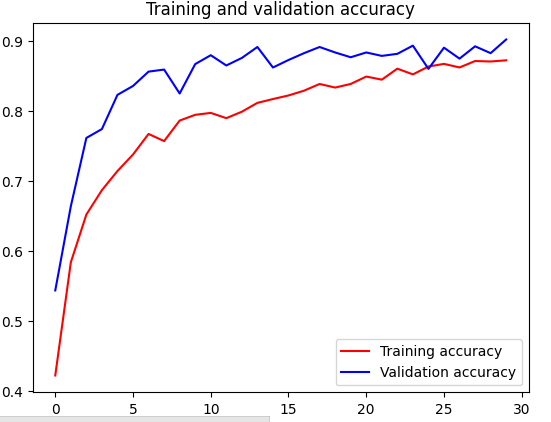

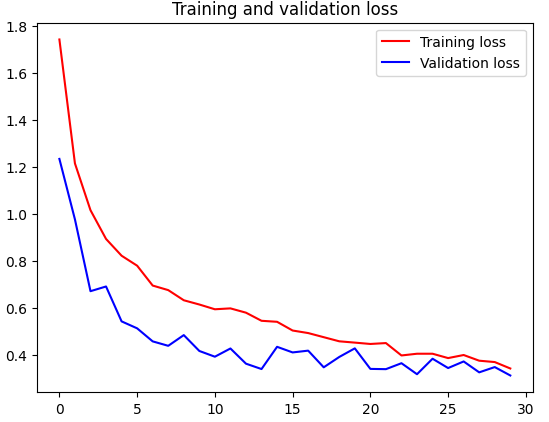

Did your model work well??

If you think this model is good enough you can proceed and save it for future predictions.

In [ ]:
# It is important to save the model in case of error in the notebook
model.save("/content/RL_item_predictor_model.keras")

# Prediction time

Now we can test our model and see how it performs.

By running this next block you will be able to upload images from your computer and see how the model classifies them.

**Give it a try!**

In [ ]:
import numpy as np
from google.colab import files
from keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  # Predicting images
  path = fn
  img = load_img(path, target_size=(220, 220))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)